In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv("Reviews.csv")
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [61]:
data.shape

(568454, 10)

In [62]:
# Checking for duplicated rows
duplicated_rows = data[data.duplicated(subset='Id')]

if duplicated_rows.empty:
    print("No duplicated rows found.")
else:
    print("Duplicated rows found:")
    print(duplicated_rows)

No duplicated rows found.


In [63]:
# Drop irrelevant features
data = data.drop(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1)

In [64]:
# Checking for the missing values
count_NaN = data.isna().sum()
count_NaN

Id       0
Score    0
Text     0
dtype: int64

# EDA

In [65]:
import plotly.express as px
fig = px.histogram(data['Score'],
                   labels={'value': 'Score',
                           'count': 'Frequency',
                           'color': 'Score'}, color=data['Score'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [66]:
# Classify the score into two classes, 0 and 1
data["Score"] = data["Score"].apply(lambda x: 0 if x < 3 else 1)
data.head()

Id  Score                                               Text
0   1      1  I have bought several of the Vitality canned d...
1   2      0  Product arrived labeled as Jumbo Salted Peanut...
2   3      1  This is a confection that has been around a fe...
3   4      0  If you are looking for the secret ingredient i...
4   5      1  Great taffy at a great price.  There was a wid...

In [67]:
import plotly.graph_objects as go
labels = ['Recommended', 'Not Recommended']
values = [data[data['Score'] == 1]['Score'].value_counts()[1],
          data[data['Score'] == 0]['Score'].value_counts()[0]]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Recommendations', title_x=0.5, title_font=dict(size=20))
fig.show()

In [68]:
value_counts = data['Score'].value_counts()
print(value_counts)

1    486417
0     82037
Name: Score, dtype: int64


In [70]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [71]:
# Convert all uppercase to lowercase
data['Text'] = data['Text'].str.lower()
data['Text'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.'

In [72]:
# Remove all characters except alphabet
import re
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-z]', ' ', inputs)

data['Text'] = data['Text'].apply(remove_punctuations_numbers)
data['Text'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most '

In [73]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Guey
[nltk_data]     Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Guey
[nltk_data]     Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Guey
[nltk_data]     Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Tokenize the text
def tokenization(inputs):  
    return word_tokenize(inputs)

data['text_tokenized'] = data['Text'].apply(tokenization)
data['text_tokenized'][0]

['i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 'my',
 'labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most']

In [75]:
# Remove stop words
stop_words = set(stopwords.words('english'))
stop_words.remove('not')

def stopwords_remove(inputs): 
    return [k for k in inputs if k not in stop_words]

data['text_stop'] = data['text_tokenized'].apply(stopwords_remove)
data['text_stop'][0]

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [76]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):  
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]

data['text_lemmatized'] = data['text_stop'].apply(lemmatization)
data['text_lemmatized'][0]

['buy',
 'several',
 'vitality',
 'can',
 'dog',
 'food',
 'products',
 'find',
 'good',
 'quality',
 'product',
 'look',
 'like',
 'stew',
 'process',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicky',
 'appreciate',
 'product',
 'better']

In [77]:
# Removing words with length less than or equal to 2
def remove_less_than_2(inputs):  
    return [j for j in inputs if len(j) > 2]

data['final'] = data['text_lemmatized'].apply(remove_less_than_2)

In [78]:
# Join the tokens into sentences
data['final'] = data['final'].str.join(' ')
data['final'][0]

'buy several vitality can dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better'

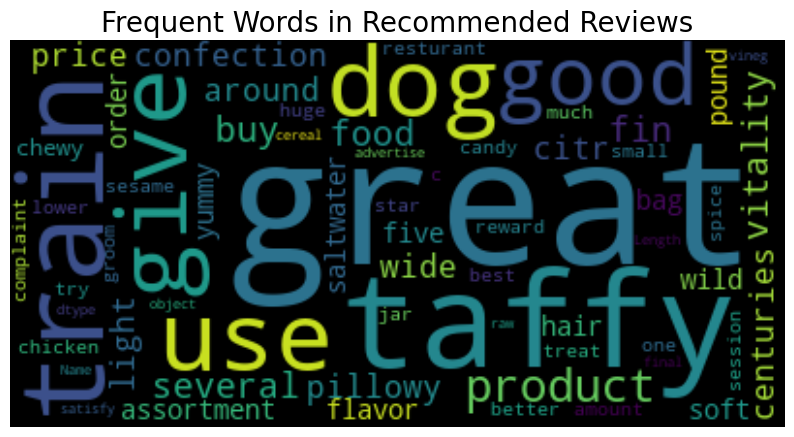

In [79]:
# Word cloud for recommended reviews
from wordcloud import WordCloud
data_recommended = data[data['Score'] == 1] 
WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_recommended['final'])))

plt.figure(figsize=(10, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('Frequent Words in Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [80]:
# X is the input features, y is the target variable
y = data['Score']
X = data['final']

In [81]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Build Deep Learning Model

In [82]:
# Most frequent 10000 words
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert to numeric representation of tokens
Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_test = tokenizer.texts_to_sequences(X_test)

In [83]:
maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

In [89]:
Padded_train.shape

(454763, 50)

In [90]:
Padded_test.shape

(113691, 50)

In [92]:
X_train.shape

(454763,)

In [93]:
X_test.shape

(113691,)

In [95]:
y_train.value_counts()

1    388907
0     65856
Name: Score, dtype: int64

In [94]:
from imblearn.over_sampling import SMOTE
# Perform SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(Padded_train, y_train)

# Check the class distribution after oversampling
print (y_resampled.value_counts())

0    388907
1    388907
Name: Score, dtype: int64


In [23]:
print(y.value_counts())

1    486417
0     82037
Name: Score, dtype: int64


In [32]:
print (y_resampled.value_counts())

1    486417
0    486417
Name: Score, dtype: int64


In [48]:
X_train.shape

(778267, 98804)

In [49]:
X_test.shape

(194567, 98804)

In [50]:
y_train.shape

(778267,)

In [51]:
y_test.shape

(194567,)

In [99]:
X_resampled.shape

(777814, 50)

In [98]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D

In [101]:
# Build the ANN model
model = Sequential()
model.add(Embedding(num_words, 100, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_resampled, y_resampled, validation_data=(Padded_test, y_test), epochs=5, batch_size=128)

# Evaluate the model on test data
loss, accuracy = model.evaluate(Padded_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Epoch 1/5
6077/6077 [==============================] - 915s 150ms/step - loss: 0.2851 - accuracy: 0.8776 - val_loss: 0.2441 - val_accuracy: 0.9017
Epoch 2/5
6077/6077 [==============================] - 836s 137ms/step - loss: 0.1618 - accuracy: 0.9375 - val_loss: 0.2020 - val_accuracy: 0.9208
Epoch 3/5
6077/6077 [==============================] - 868s 143ms/step - loss: 0.1262 - accuracy: 0.9520 - val_loss: 0.2028 - val_accuracy: 0.9234
Epoch 4/5
6077/6077 [==============================] - 879s 145ms/step - loss: 0.1064 - accuracy: 0.9600 - val_loss: 0.1961 - val_accuracy: 0.9300
Epoch 5/5
3553/3553 [==============================] - 36s 10ms/step - loss: 0.1839 - accuracy: 0.9349
Accuracy: 0.9349464774131775


# Machine Learning


In [102]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text to numeric vector
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [103]:
from imblearn.over_sampling import SMOTE
# Perform SMOTE oversampling
smote = SMOTE()
X_resampled2, y_resampled2 = smote.fit_resample(X_train_count, y_train)

# Check the class distribution after oversampling
print (y_resampled2.value_counts())

0    388907
1    388907
Name: Score, dtype: int64


In [104]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000)
log.fit(X_resampled2, y_resampled2)
y_pred = log.predict(X_test_count) 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8929114881564943


In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_resampled2, y_resampled2)
y_pred = svc.predict(X_test_count)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

In [106]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_resampled2, y_resampled2)
y_pred = nb.predict(X_test_count)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.872865926062749
